# Imports for plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
%config Completer.use_jedi = False

# Download data

In [5]:
from selectionfunctions.config import config
config['data_dir'] = '/data/asfe2/Projects/testselectionfunctions/'

In [4]:
import selectionfunctions.cog_v
selectionfunctions.cog_v.fetch()

Error looking up DOI "None" in the Harvard Dataverse.
{"status":"ERROR","message":"Dataset with Persistent ID doi:None not found."}


HTTPError: 404 Client Error: Not Found for url: https://dataverse.harvard.edu/api/datasets/:persistentId?persistentId=doi:None

# Simple query

In [3]:
import selectionfunctions.cog_v as CoGV
import selectionfunctions.cog_ii as CoGII
from selectionfunctions.source import Source

In [6]:
dr3_sf = CoGII.dr3_sf(version='modelAB',crowding=False)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 4.291 s
  auxilliary:   4.289 s
          sf:   0.002 s
interpolator:   0.000 s
Loading auxilliary data ...


In [7]:
ast_sf = CoGV.subset_sf(map_fname='astrometry_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
<class 'list'>
t = 0.098 s
  auxilliary:   0.079 s
          sf:   0.000 s
interpolator:   0.018 s


/home/andy/py36/lib/python3.6/site-packages/selectionfunctions/cog_v.py:836: RuntimeWarning: overflow encountered in power
  u = l*(l+1) / np.power(self.B,2.0*j)


In [9]:
rvs_sf = CoGV.subset_sf(map_fname='rvs_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
<class 'list'>
t = 0.573 s
  auxilliary:   0.556 s
          sf:   0.000 s
interpolator:   0.017 s


In [33]:
ruwe_sf = CoGV.subset_sf(map_fname='ruwe1p4_magonly_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
t = 0.055 s
  auxilliary:   0.038 s
          sf:   0.000 s
interpolator:   0.018 s


In [41]:
ruwe_cm_sf = CoGV.subset_sf(map_fname='ruwe1p4_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
t = 0.243 s
  auxilliary:   0.225 s
          sf:   0.000 s
interpolator:   0.019 s


In [13]:
for g in [13, 20.5]:
    coords = Source('12h30m25.3s', '15d15m58.1s', frame='icrs', photometry={'gaia_g':g, 'gaia_g_gaia_rp':0.5})
    
    print(f'G = {g:.1f}')
    print(f'P(Gaia EDR3) = {dr3_sf(coords)*100:.1f}%')
    print(f'P(astrometry | EDR3) = {ast_sf(coords)*100:.1f}% \nP(astrometry) = {dr3_sf(coords)*ast_sf(coords)*100:.1f}%')
    print(f'P(RUWE<1.4 | EDR3) = {ruwe_sf(coords)*100:.1f}%  \nP(RUWE<1.4) = {dr3_sf(coords)*ruwe_sf(coords)*100:.1f}%')
    print(f'P(RVS | EDR3) = {rvs_sf(coords)*100:.1f}% \nP(RVS) = {dr3_sf(coords)*rvs_sf(coords)*100:.1f}%')

G = 13.0
P(Gaia EDR3) = 100.0%
P(astrometry | EDR3) = 98.8% 
P(astrometry) = 98.8%
P(RUWE<1.4 | EDR3) = 85.8%  
P(RUWE<1.4) = 85.8%
P(RVS | EDR3) = 28.5% 
P(RVS) = 28.5%
G = 20.5
P(Gaia EDR3) = 100.0%
P(astrometry | EDR3) = 92.8% 
P(astrometry) = 92.8%
P(RUWE<1.4 | EDR3) = 53.0%  
P(RUWE<1.4) = 53.0%
P(RVS | EDR3) = 0.0% 
P(RVS) = 0.0%


# HVS 1

In [10]:
# Introduce source
s5_hvs1 = Source('22h54m51.68s',
           '-51d11m44.19s',
           photometry={'gaia_g':16.02,
                       'gaia_bp_gaia_rp':0.008},
           frame='icrs')
           
# Selection probability
print(dr3_sf(s5_hvs1), dr3_sf(s5_hvs1) * rvs_sf(s5_hvs1))

1.0 3.0650014872459115e-09


In [194]:
import sys
sys.path.append('/home/andy/Documents/software/')
import getdata, sqlutilpy
query = """select * from gaia_dr2.gaia_source
            where source_id=6513109241989477504"""
sqlutilpy.get(query, asDict=True, **getdata.sql_args)

OrderedDict([('solution_id', array([1635721458409799680])),
             ('designation',
              array(['Gaia DR2 6513109241989477504'], dtype='<U28')),
             ('source_id', array([6513109241989477504])),
             ('random_index', array([146023659])),
             ('ref_epoch', array([2015.5])),
             ('ra', array([343.71534551])),
             ('ra_error', array([0.03073733])),
             ('dec', array([-51.19560765])),
             ('dec_error', array([0.06493623])),
             ('parallax', array([-0.0422674])),
             ('parallax_error', array([0.09192119])),
             ('parallax_over_error', array([-0.45982215], dtype=float32)),
             ('pmra', array([35.32834017])),
             ('pmra_error', array([0.08423517])),
             ('pmdec', array([0.58778595])),
             ('pmdec_error', array([0.12596292])),
             ('ra_dec_corr', array([0.2644433], dtype=float32)),
             ('ra_parallax_corr', array([-0.2005595], dtype=float32)

In [195]:
query = """select * from gaia_dr2.ruwe
            where source_id=6513109241989477504"""
sqlutilpy.get(query, asDict=True, **getdata.sql_args)

OrderedDict([('source_id', array([6513109241989477504])),
             ('ruwe', array([1.0628444], dtype=float32))])

# Querying arrays of coordinates

In [14]:
l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])
g = np.array([20.8,21.0,21.2])

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords)

print(prob_selection)

[0.83539643 0.56360625 0.00244518]


In [15]:
l = np.linspace(0., 180., 12)
b = np.zeros(12)
g = 21.0*np.ones(12)
l.shape = (3, 4)
b.shape = (3, 4)
g.shape = (3, 4)

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords)

print(prob_selection)

[[0.07625137 0.02165705 0.04093587 0.51023212]
 [0.69631802 0.7364151  0.53890539 0.5958052 ]
 [0.80857823 0.47867269 0.13644613 0.13340093]]


# Maps

In [24]:
import astropy.units as units

l = np.linspace(-180.0, 180.0, 1000)
b = np.linspace(-90.0,90.0, 500)
l, b = np.meshgrid(l, b)

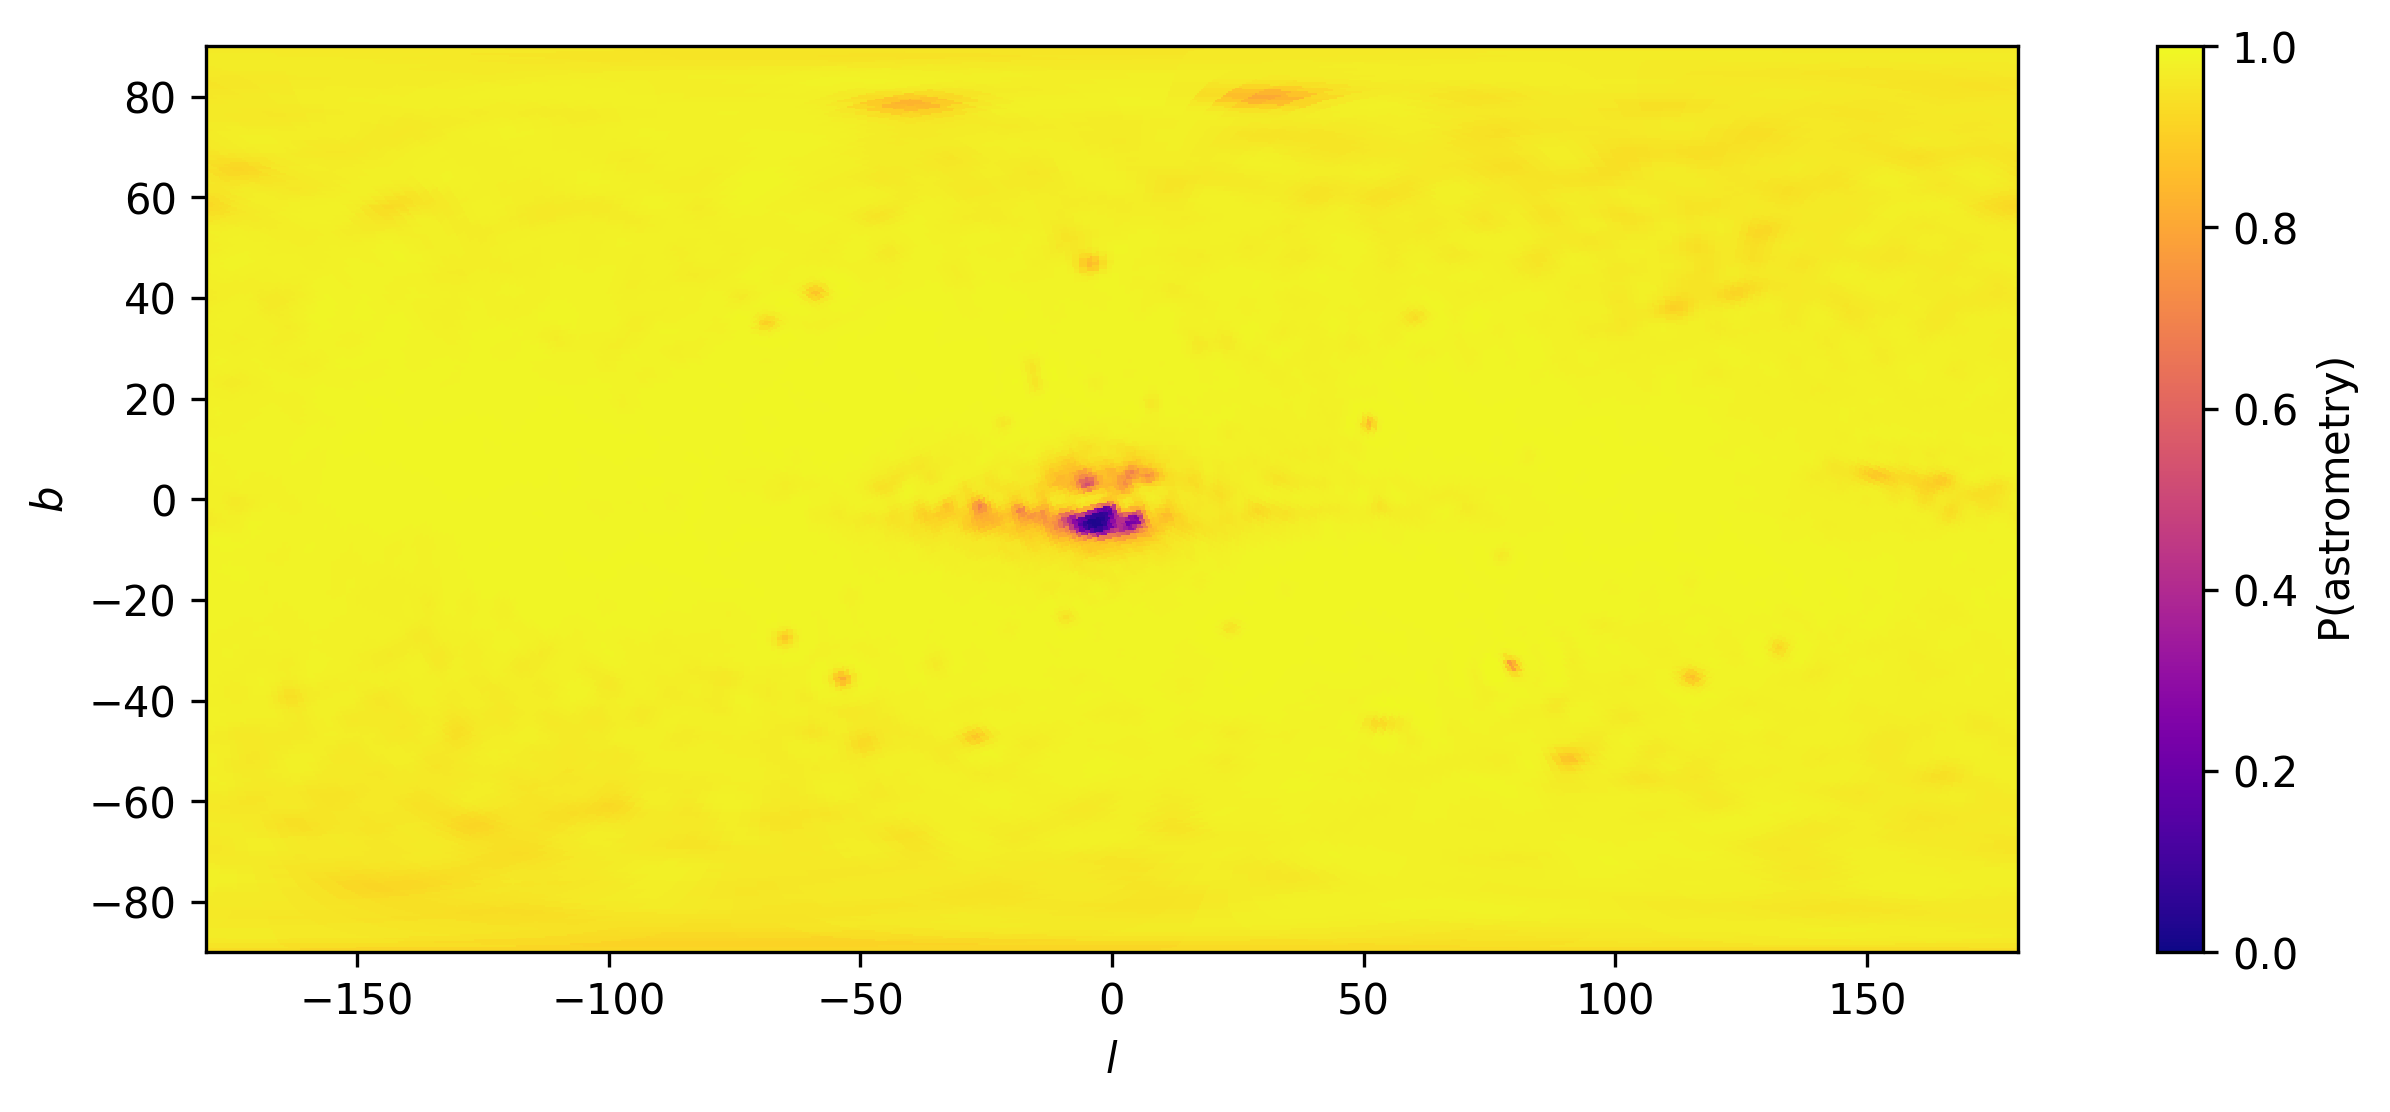

In [37]:
g = 20.*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{astrometry})$')

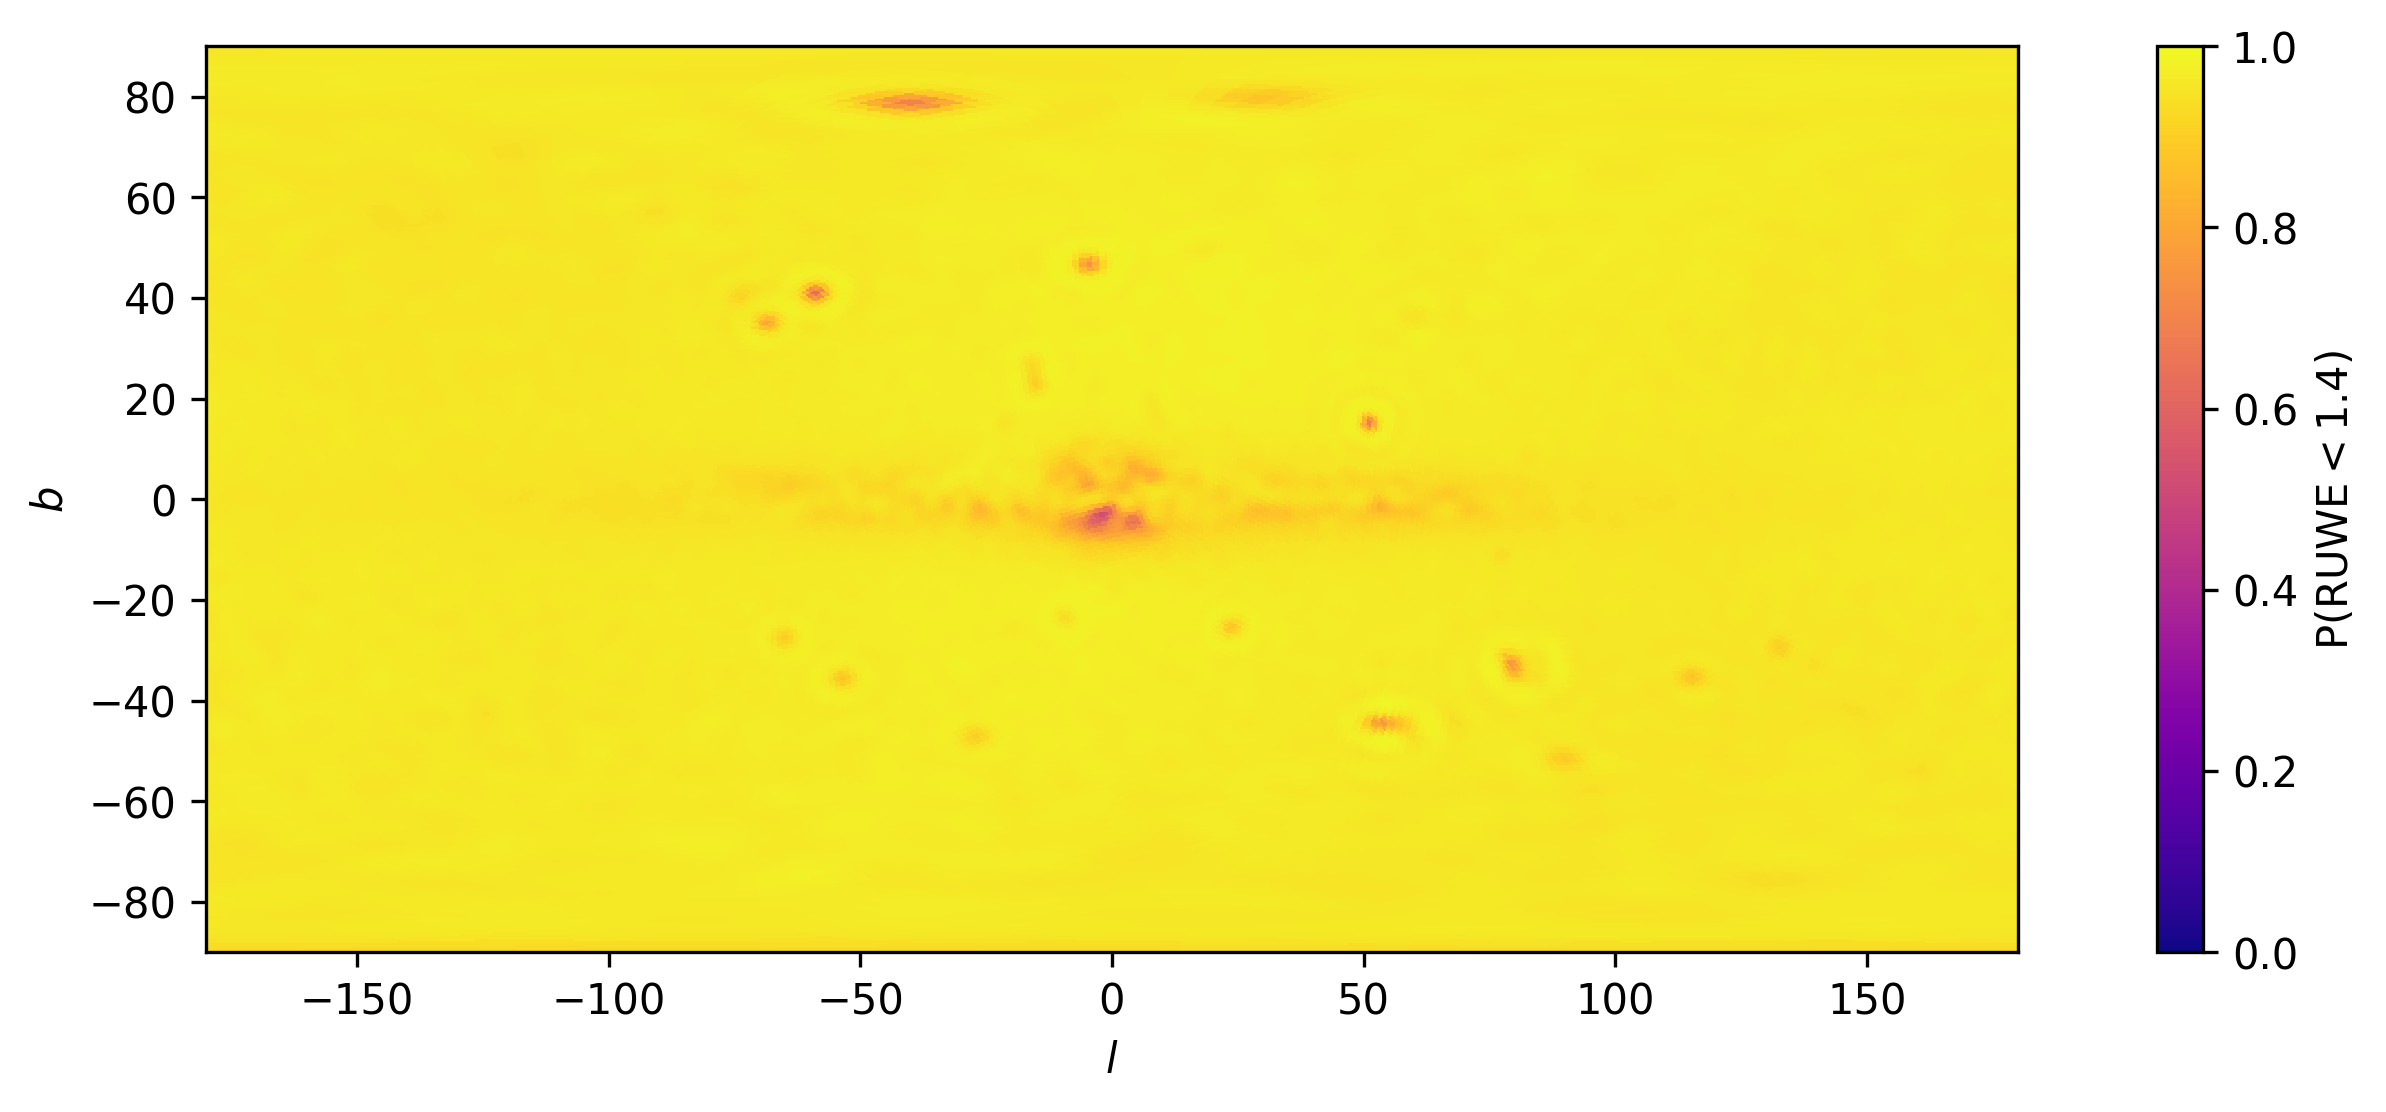

In [38]:
g = 18.*np.ones(l.shape)
g_grp = 1.0*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})#, 'gaia_g_gaia_rp':g_grp})

prob_selection = ruwe_sf(coords)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{RUWE}<1.4)$')

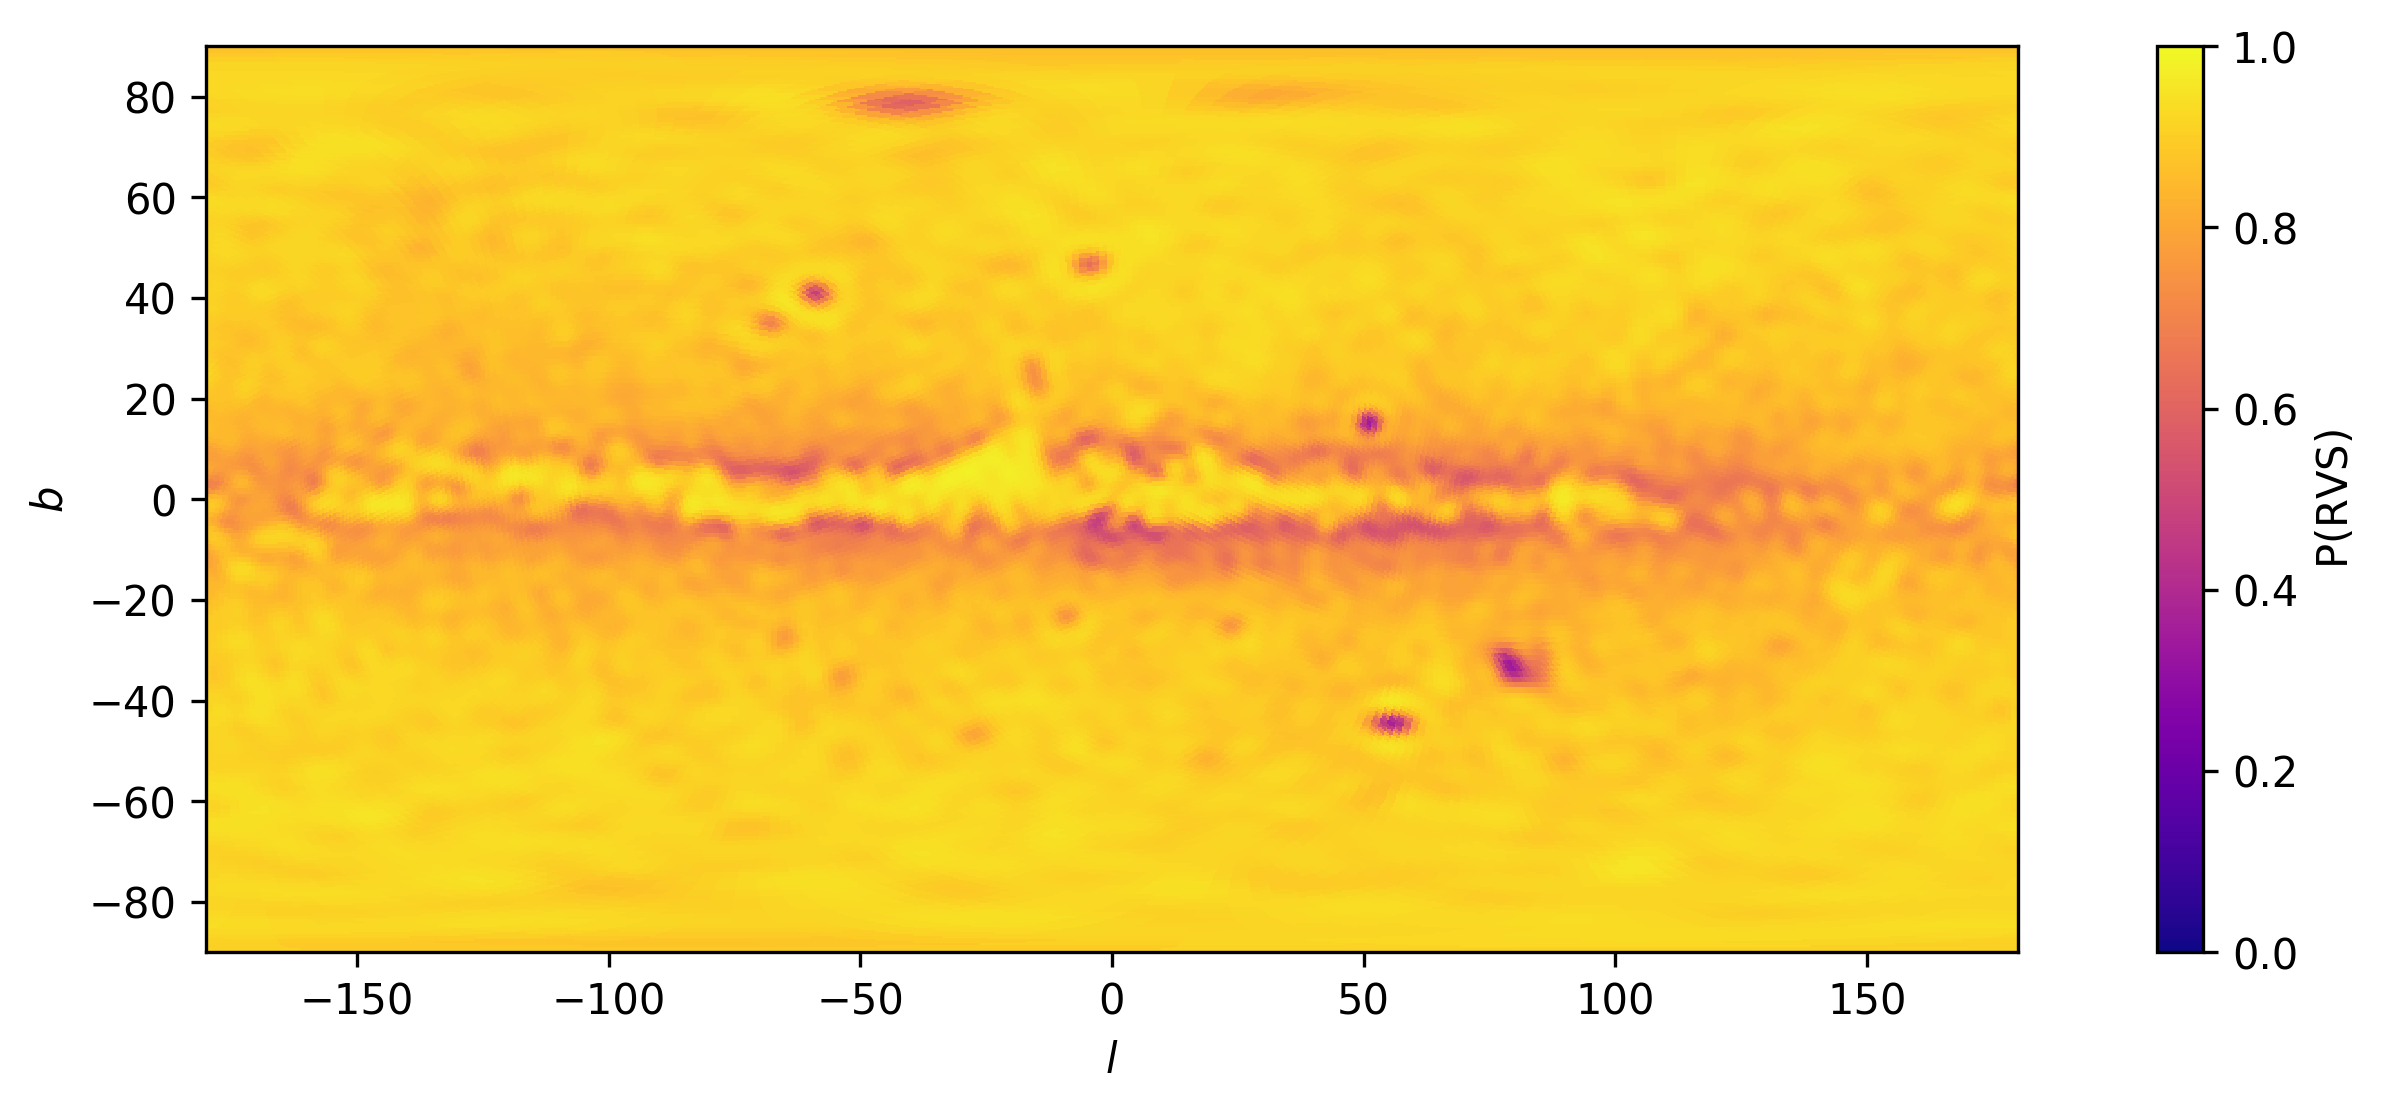

In [44]:
g = 18*np.ones(l.shape)
g_grp = 1.5*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g, 'gaia_g_gaia_rp':g_grp})

prob_selection = ruwe_cm_sf(coords)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )
plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{RVS})$')

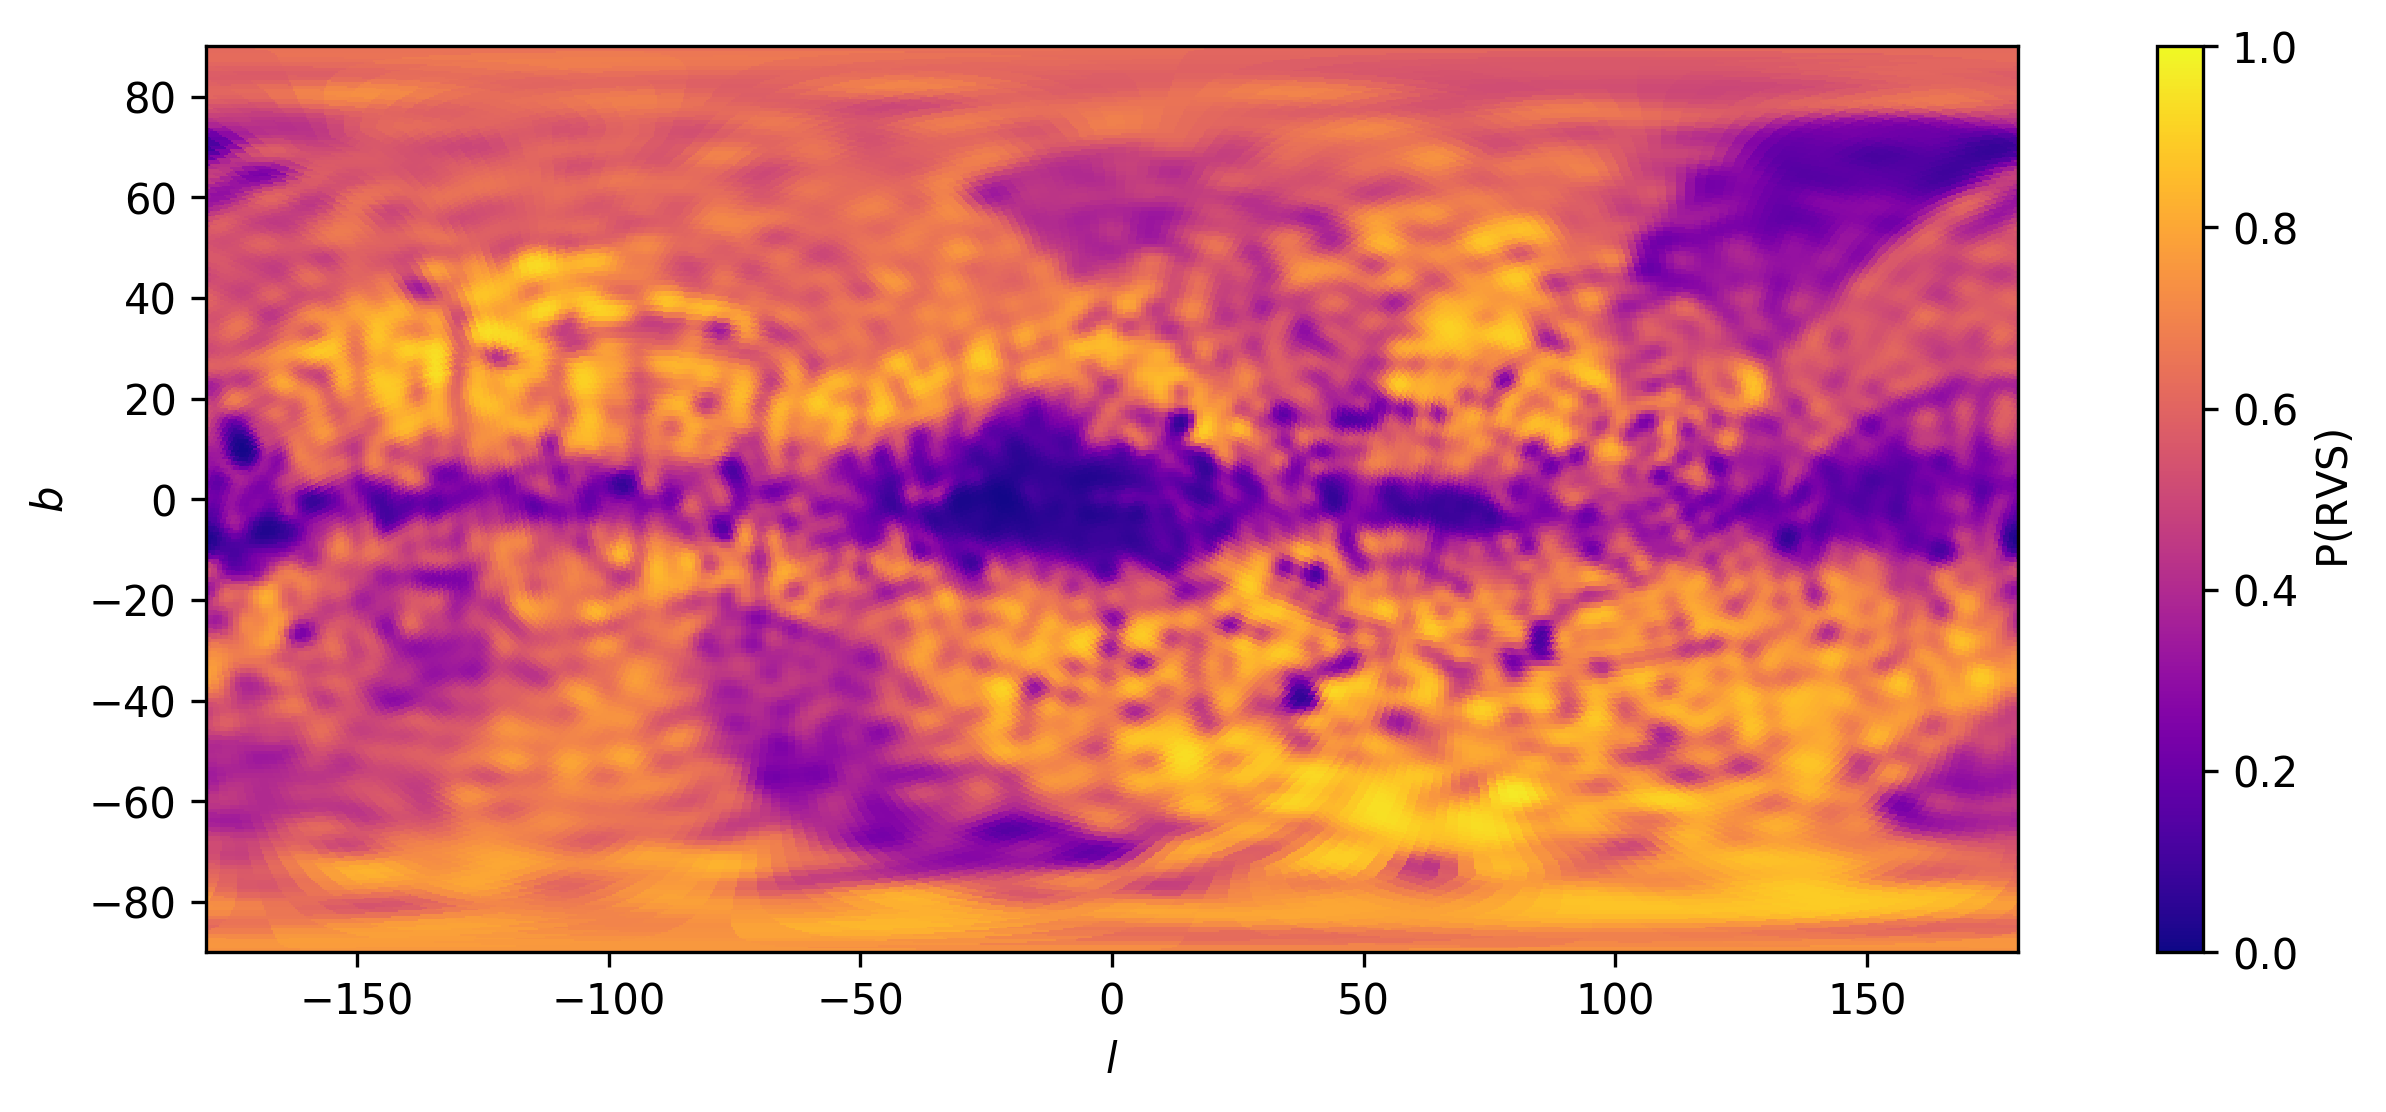

In [30]:
g = 12.7*np.ones(l.shape)
g_grp = 0.5*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g, 'gaia_g_gaia_rp':g_grp})

prob_selection = rvs_sf(coords)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )
plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{RVS})$')

# Use Gaussian Process

In [127]:
ast_sf = CoGV.subset_sf(map_fname='astrometry_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='/data/asfe2/Projects/astrometry/SphericalWavelets/')

Loading auxilliary data ...
<class 'list'>
t = 0.097 s
  auxilliary:   0.066 s
          sf:   0.000 s
interpolator:   0.031 s


/home/andy/py36/lib/python3.6/site-packages/selectionfunctions/cog_v.py:833: RuntimeWarning: overflow encountered in power
  u = l*(l+1) / np.power(self.B,2.0*j)


In [143]:
g = np.arange(1.6,22,0.05) + 1e-10
g = ast_sf.Mcenters
l = np.zeros(len(g)); b = np.zeros(len(g))
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

In [144]:
grid_prob = ast_sf(coords)

In [156]:
gp_prob = ast_sf(coords, method='gp')

(102, 1)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.8007374  0.59901554 0.         ... 0.         0.         0.        ]
 [0.41111229 0.78719897 0.45967865 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.30755857 0.         0.        ]
 [0.         0.         0.         ... 0.68634389 0.30755857 0.        ]
 [0.         0.         0.         ... 0.59838353 0.68634389 0.30755857]]


In [158]:
covariance = ast_sf.covariance_kernel(ast_sf.Mcenters, ast_sf.Mcenters, lengthscale=ast_sf.lengthscale_m)

In [159]:
covariance

array([[1.        , 0.8007374 , 0.41111229, ..., 0.        , 0.        ,
        0.        ],
       [0.8007374 , 1.        , 0.8007374 , ..., 0.        , 0.        ,
        0.        ],
       [0.41111229, 0.8007374 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.8007374 ,
        0.41111229],
       [0.        , 0.        , 0.        , ..., 0.8007374 , 1.        ,
        0.8007374 ],
       [0.        , 0.        , 0.        , ..., 0.41111229, 0.8007374 ,
        1.        ]])

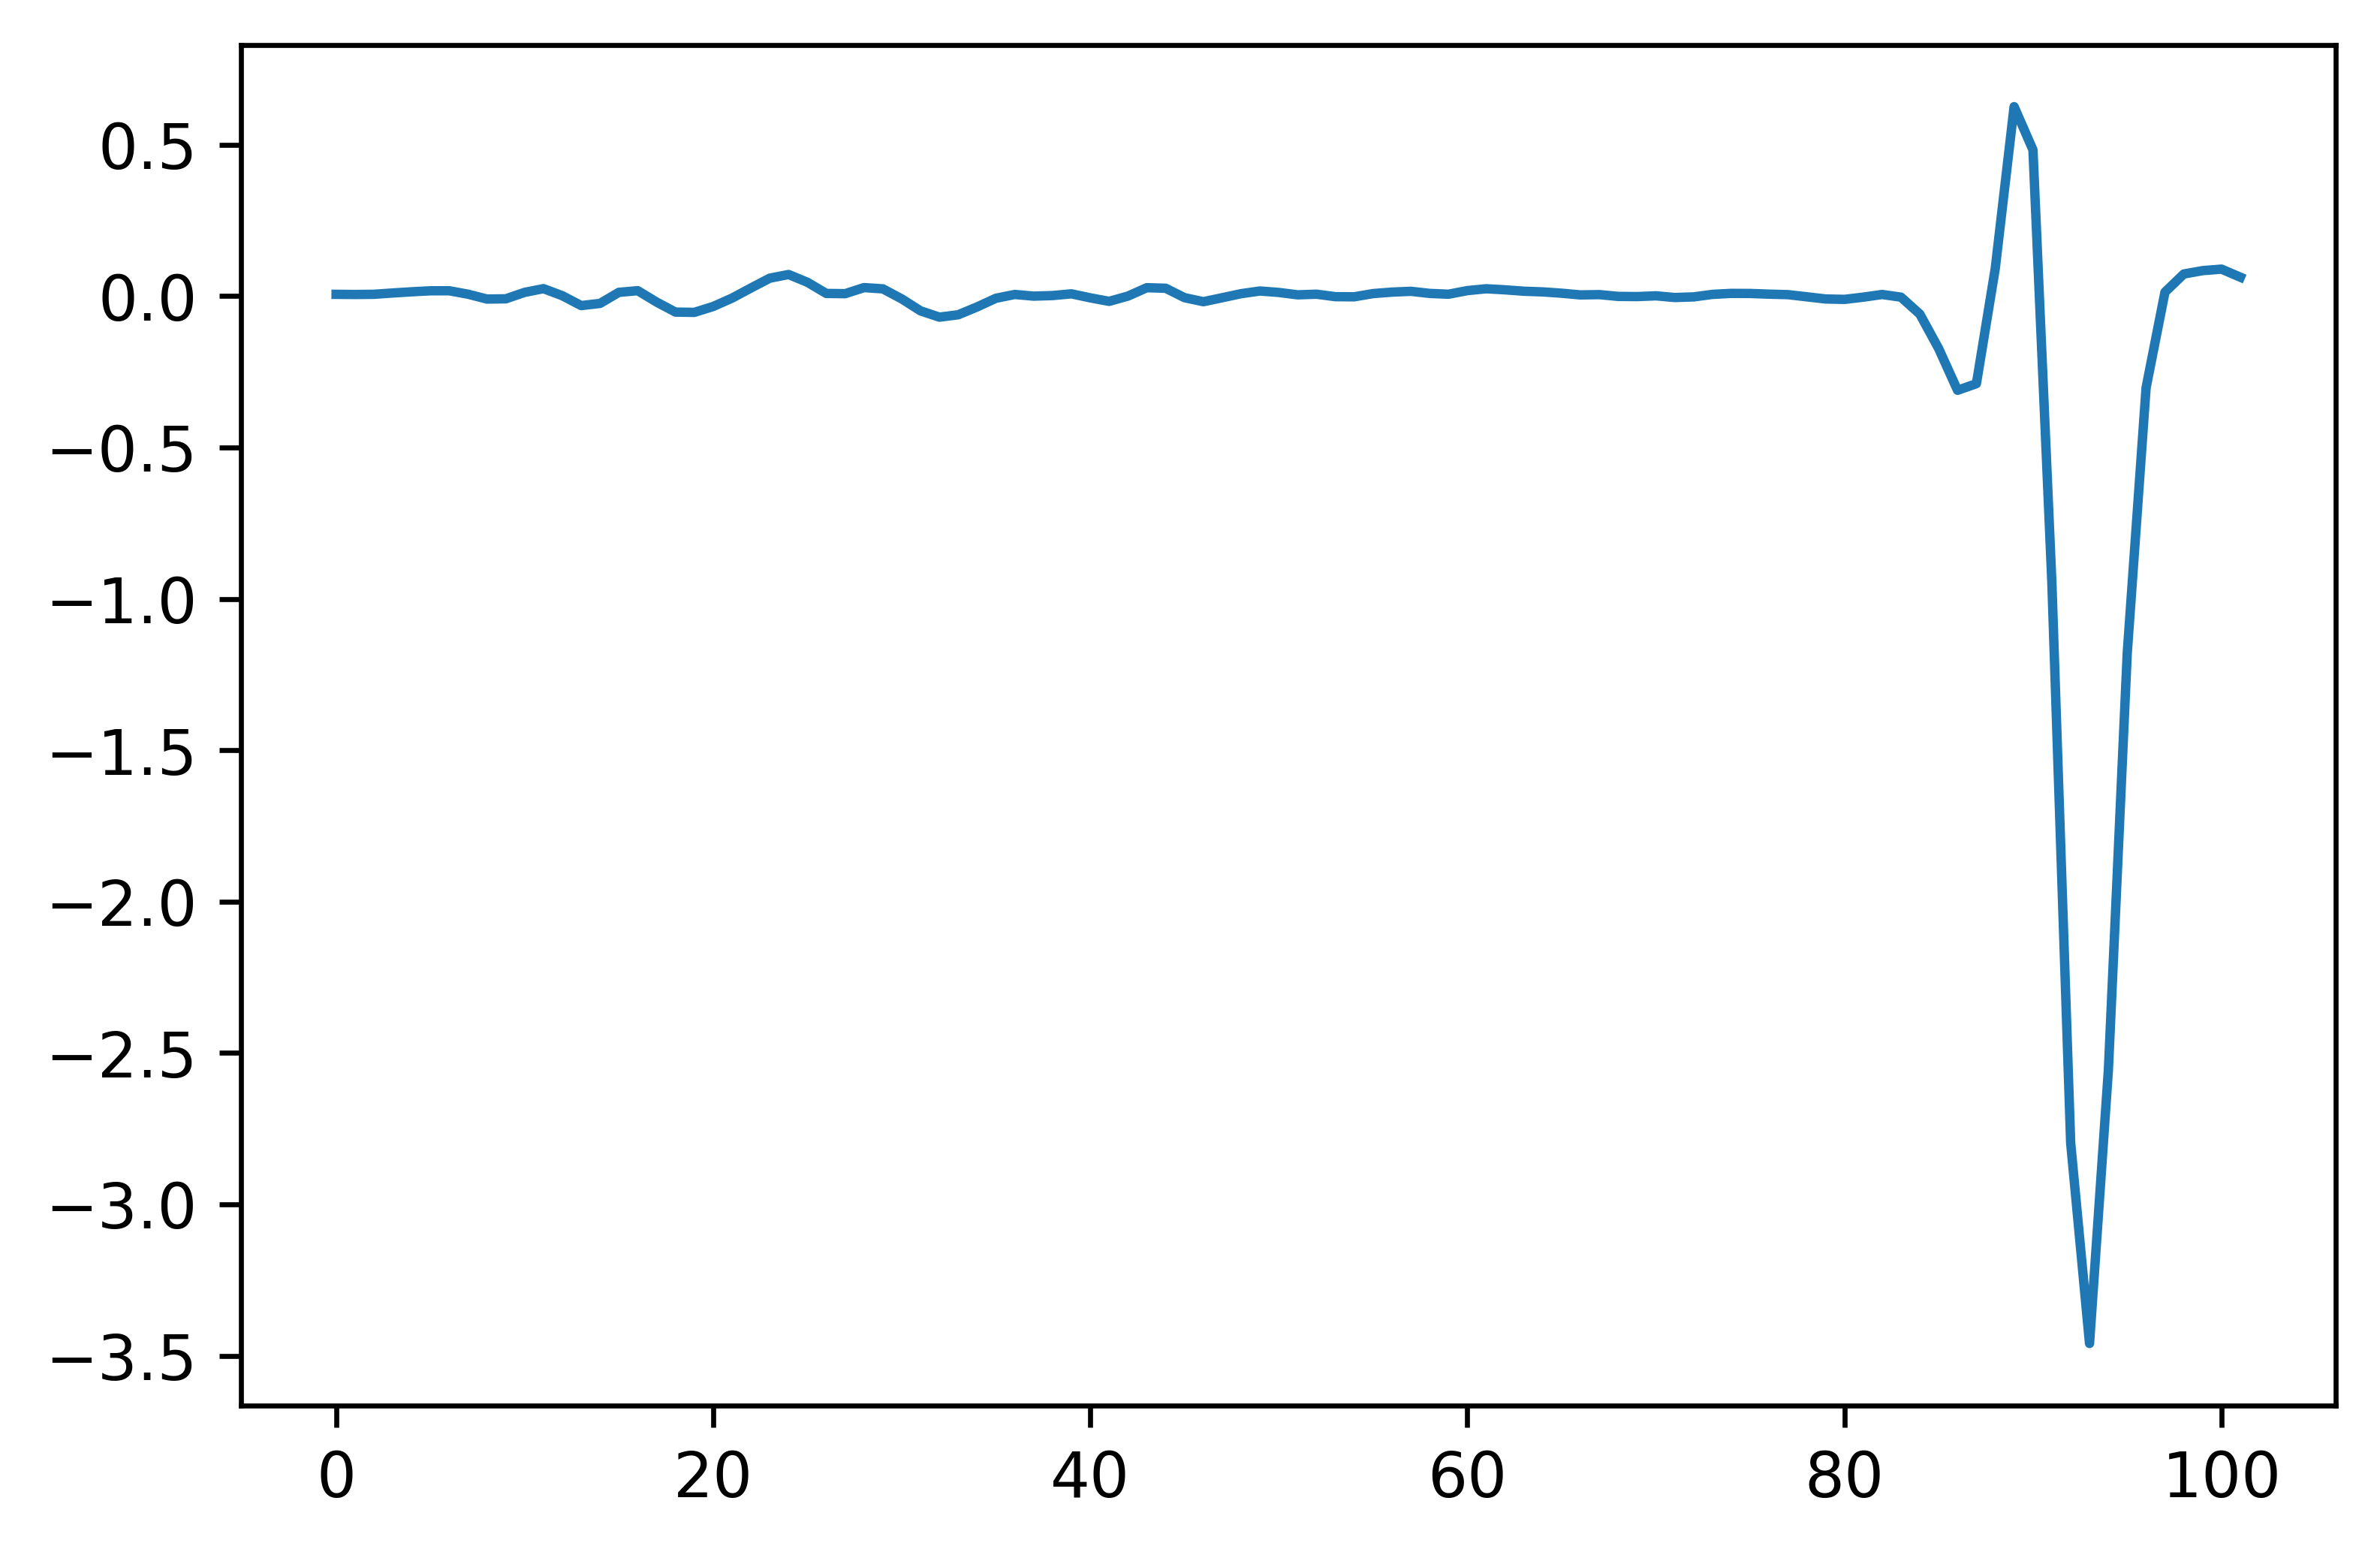

In [182]:
plt.plot(ast_sf.b[4,:,0])

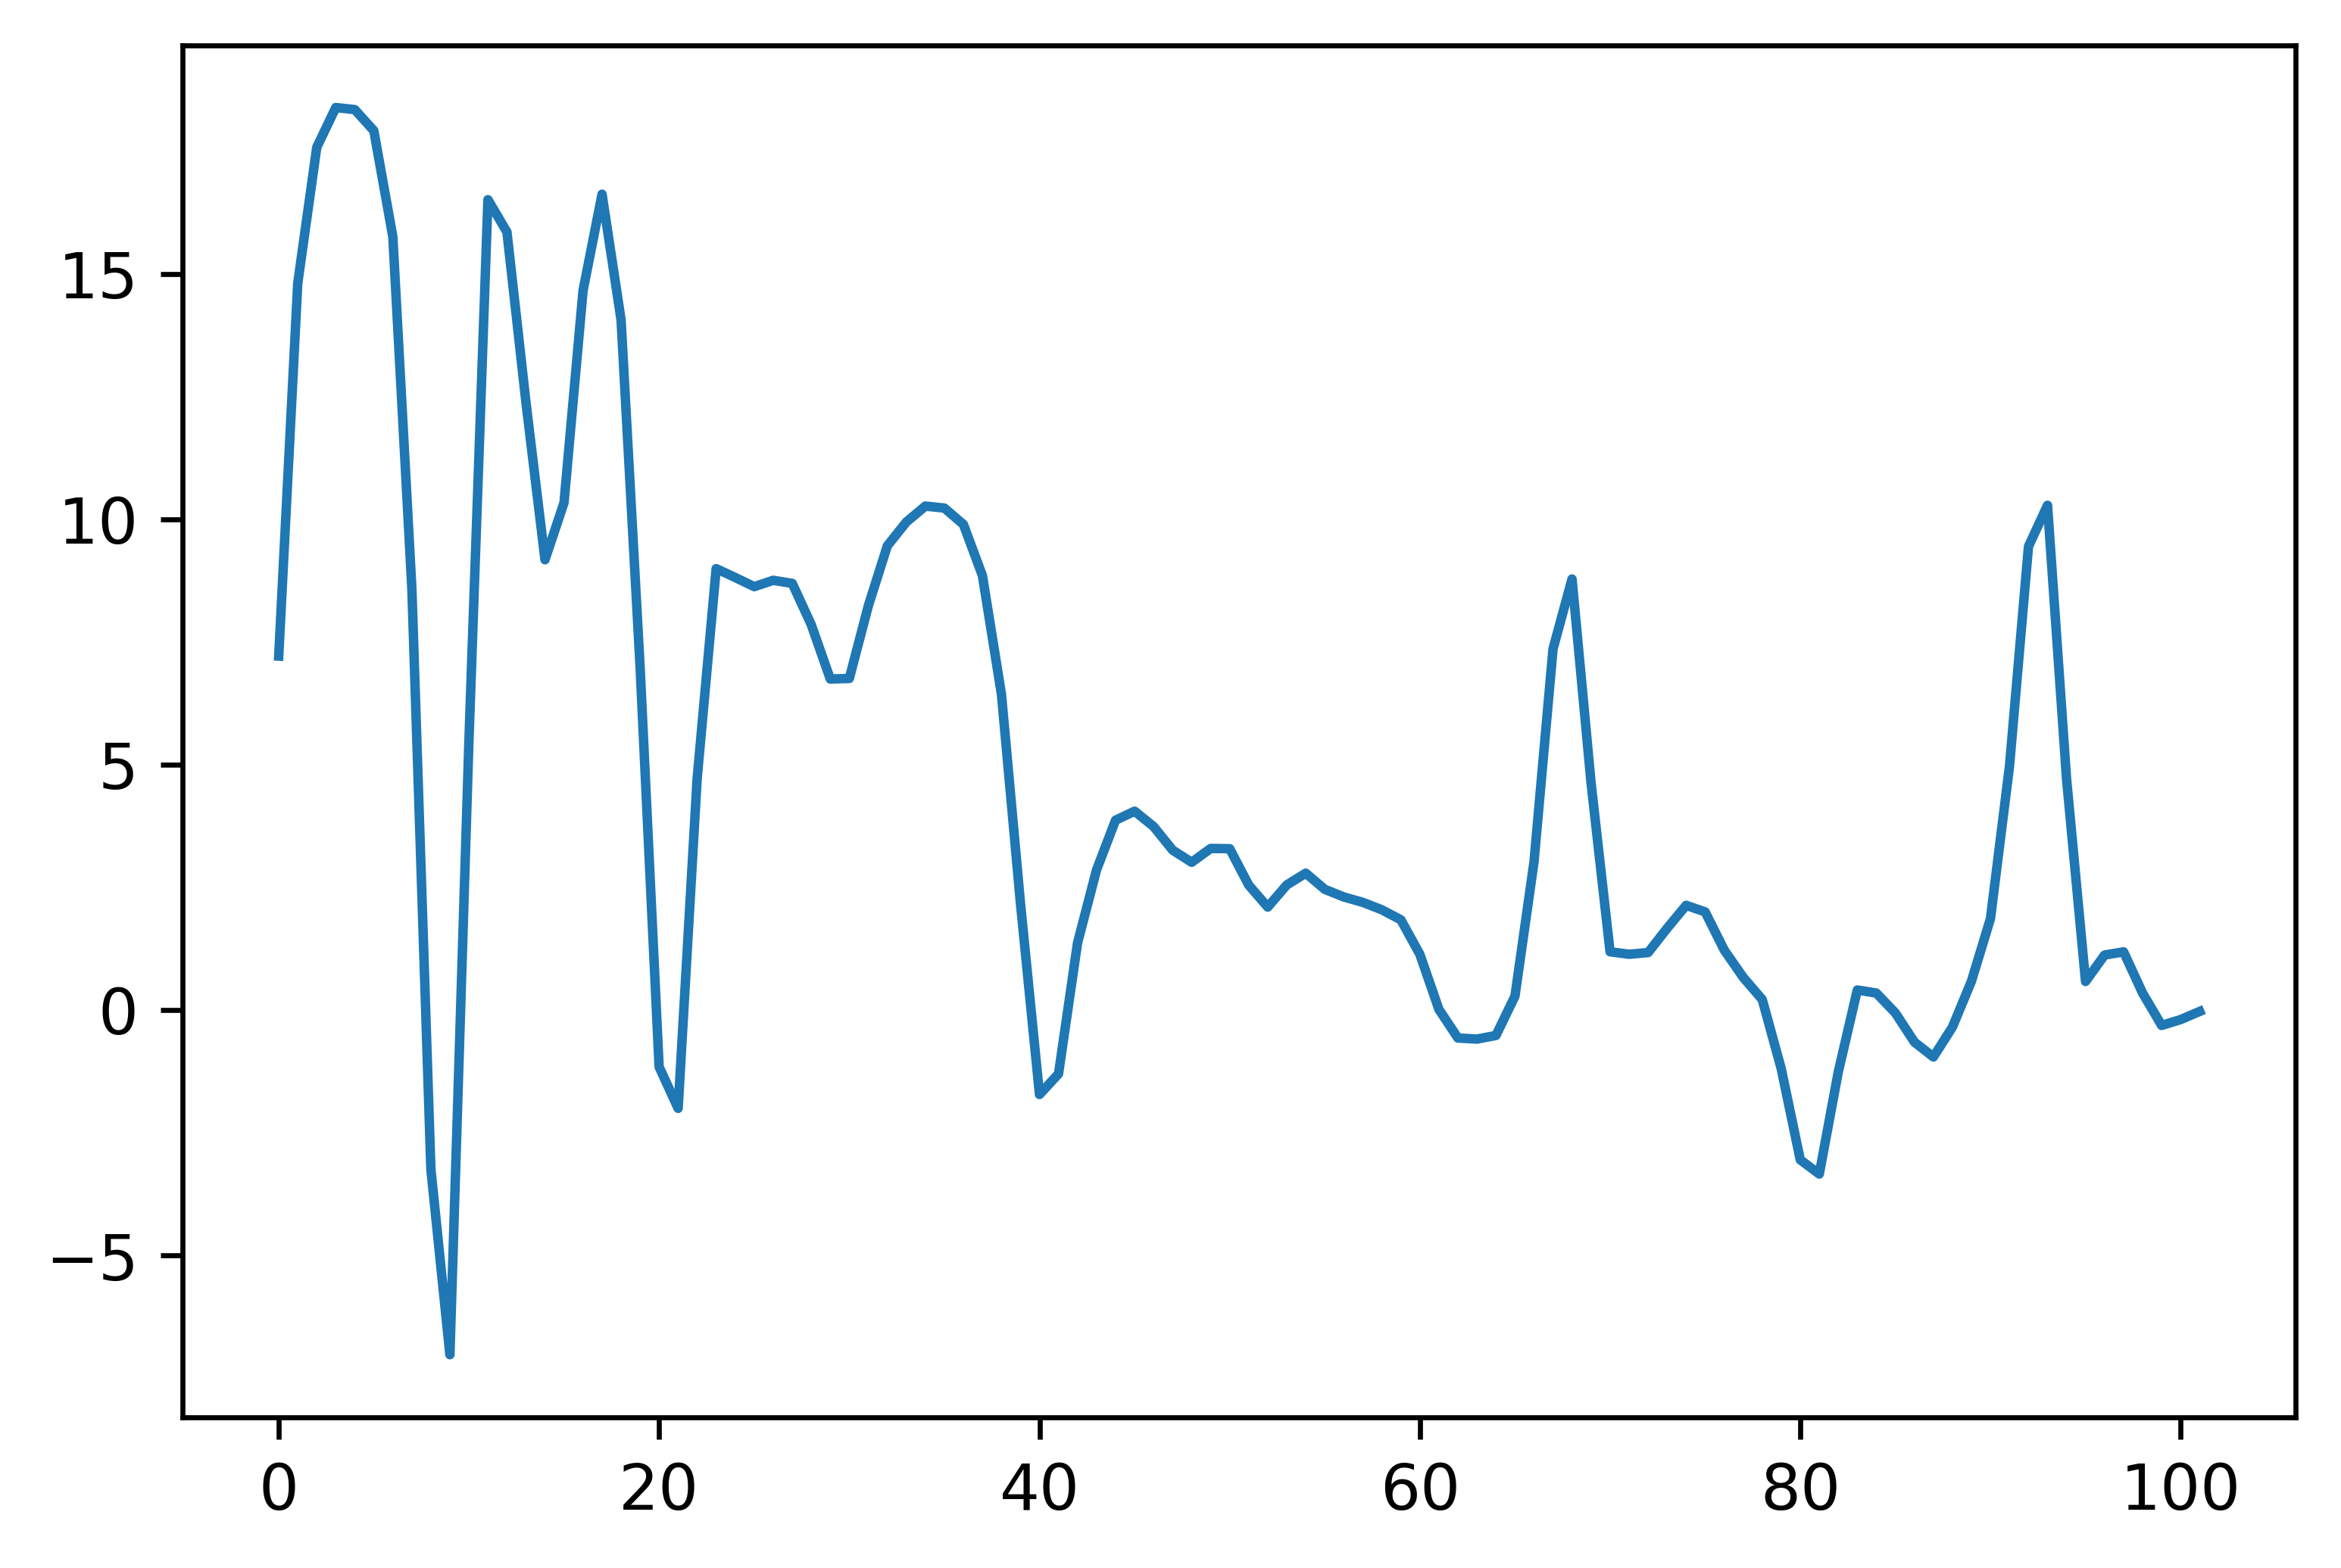

In [171]:
plt.plot((np.linalg.cholesky(covariance).T @ ast_sf.z[:,:,0].T)[:,0])

In [94]:
ast_sf.lengthscale_m

0.3

In [96]:
covariance[:,80]

array([2.85655008e-02, 1.80630134e-02, 1.11089965e-02, 6.64501128e-03,
       3.86592014e-03, 2.18749112e-03, 1.20385999e-03, 6.44379820e-04,
       3.35462627e-04, 1.69856676e-04, 8.36483471e-05, 4.00652973e-05,
       1.86644691e-05, 8.45666596e-06, 3.72665317e-06, 1.59725788e-06,
       6.65836146e-07, 2.69957850e-07, 1.06453714e-07, 4.08283603e-08,
       1.52299797e-08, 5.52551771e-09, 1.94976778e-09, 6.69158608e-10,
       2.23363143e-10, 7.25153955e-11, 2.28973484e-11, 7.03196060e-12,
       2.10040929e-12, 6.10193666e-13, 1.72412093e-13, 4.73809778e-14,
       1.26641655e-14, 3.29219386e-15, 8.32396965e-16, 2.04697171e-16,
       4.89586525e-17, 1.13889408e-17, 2.57675710e-18, 5.67021976e-19,
       1.21356366e-19, 2.52616377e-20, 5.11442372e-21, 1.00708974e-21,
       1.92874984e-22, 3.59269127e-23, 6.50878849e-24, 1.14687658e-24,
       1.96548382e-25, 3.27611038e-26])

/home/andy/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


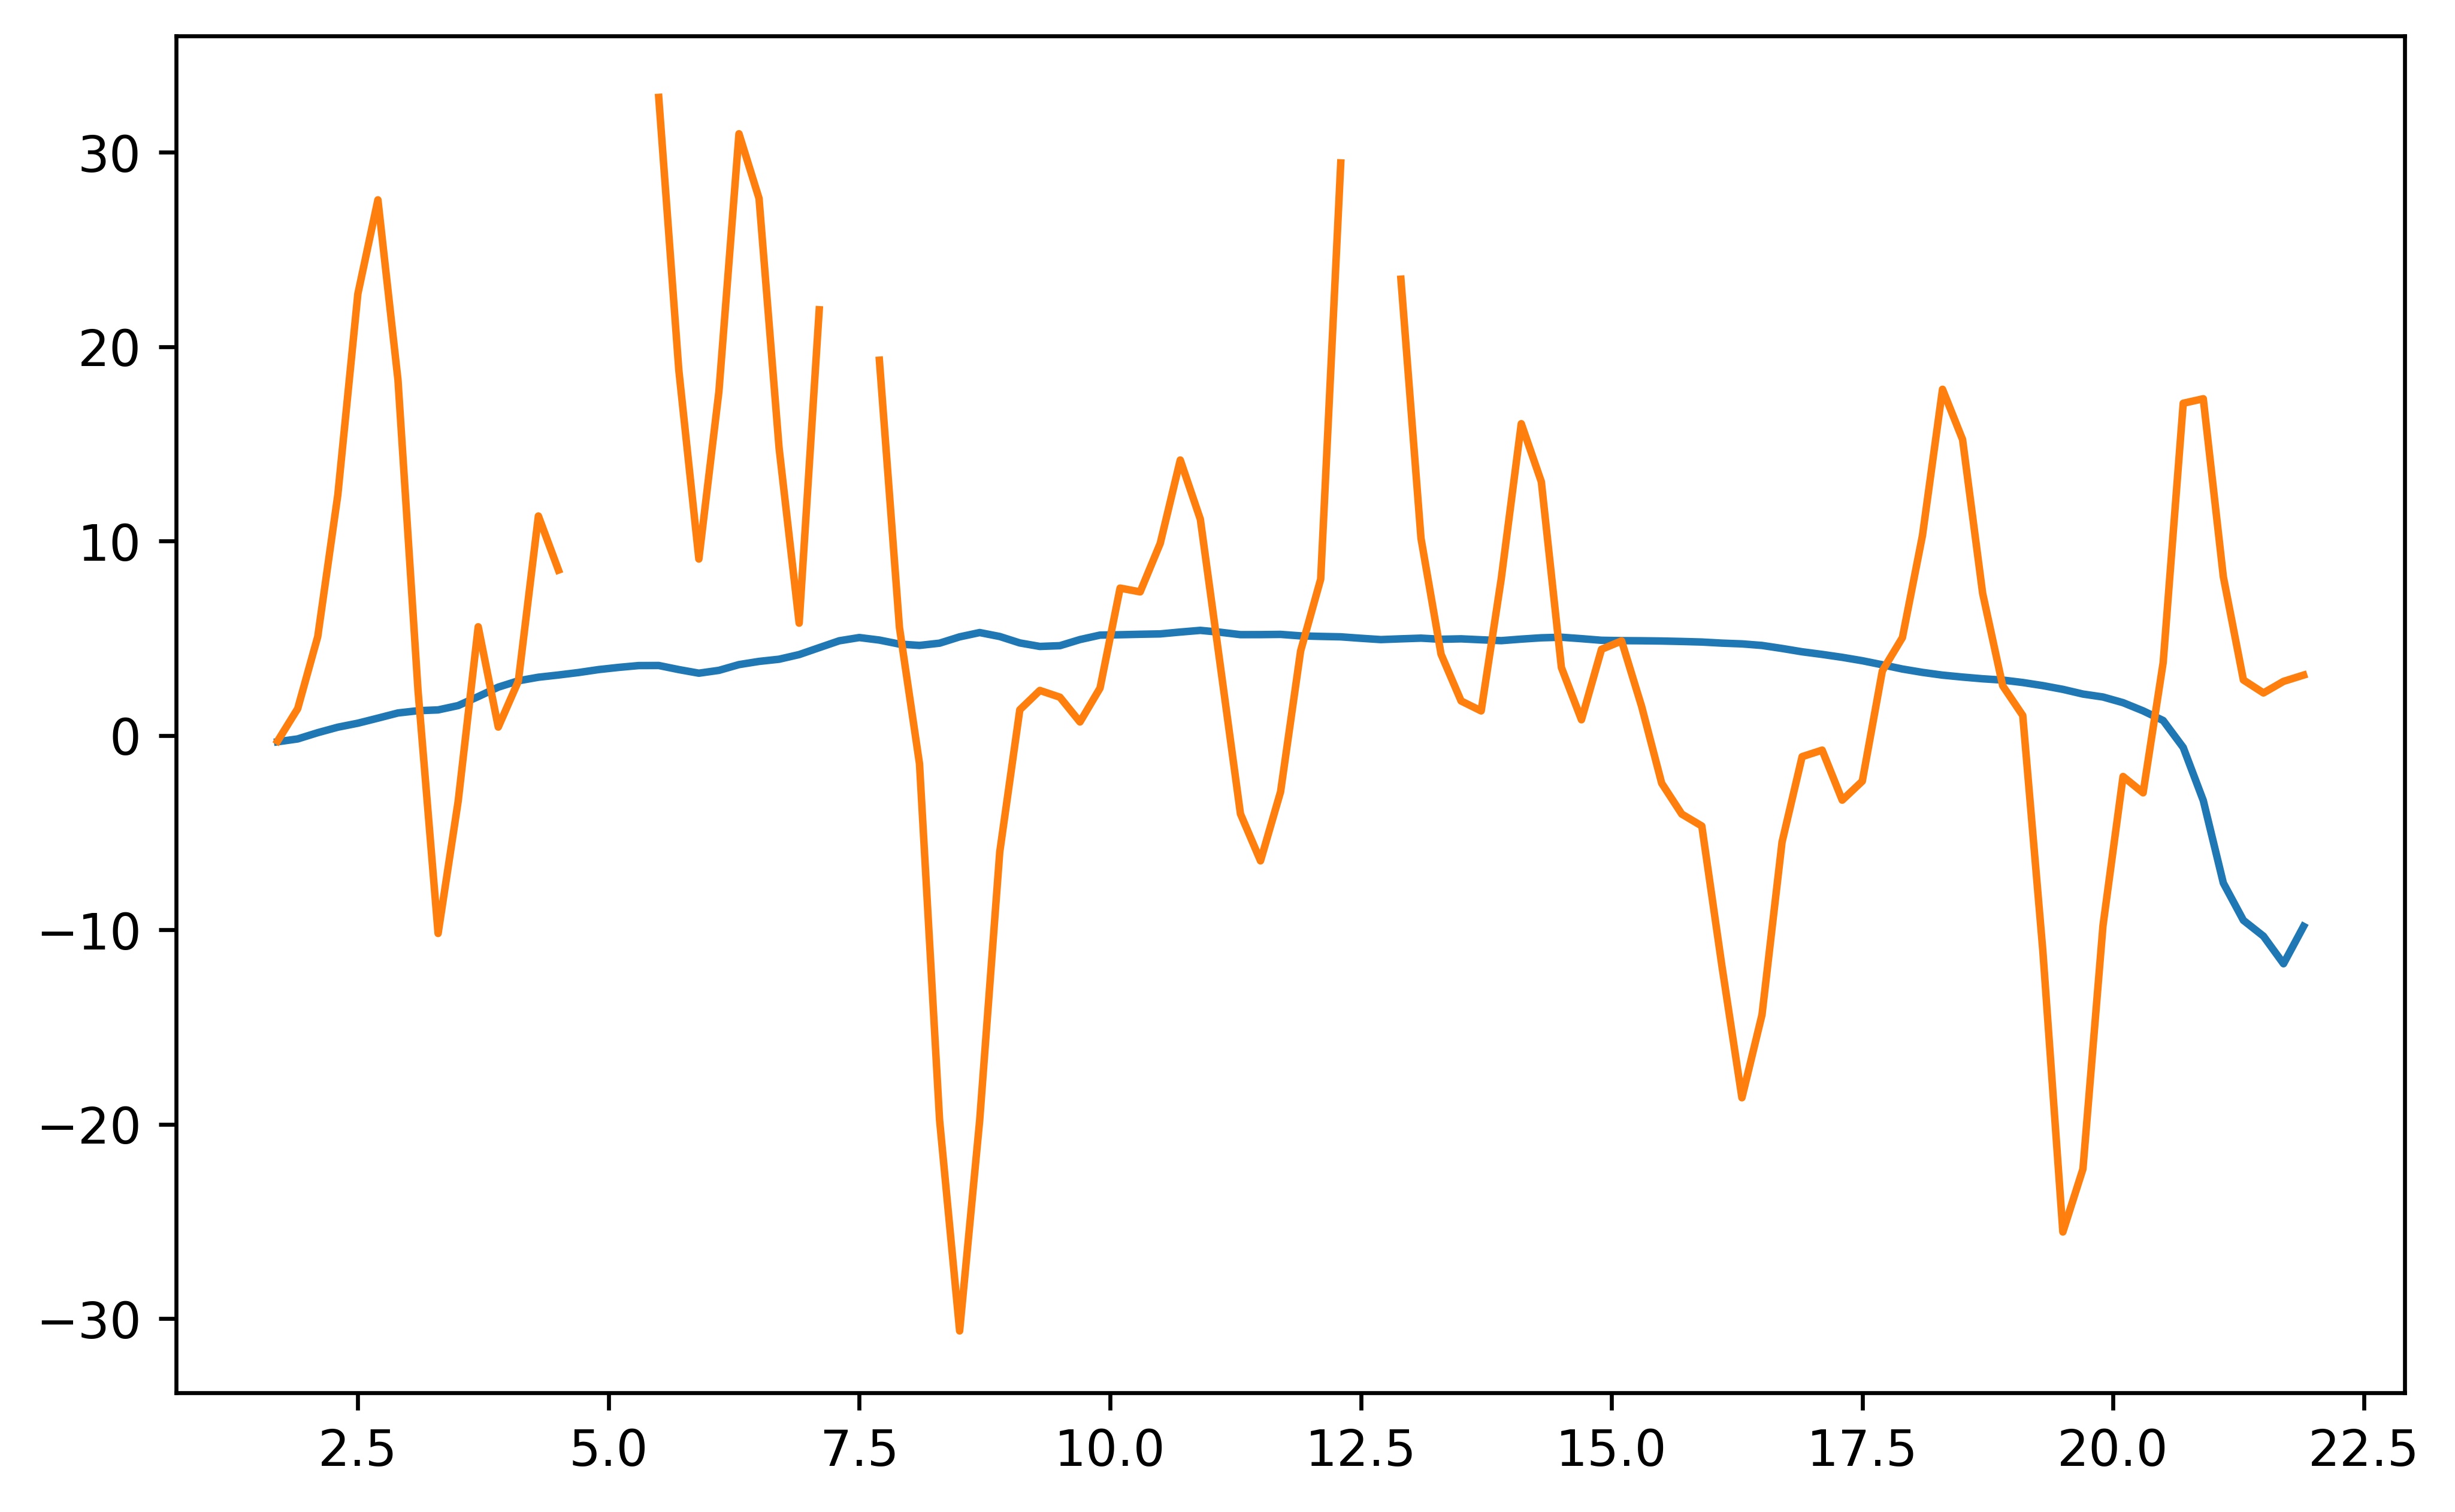

In [157]:
logit = lambda p: np.log(p/(1-p))
plt.figure(figsize=(8,5))
plt.plot(g, logit(grid_prob))
plt.plot(g, logit(gp_prob))

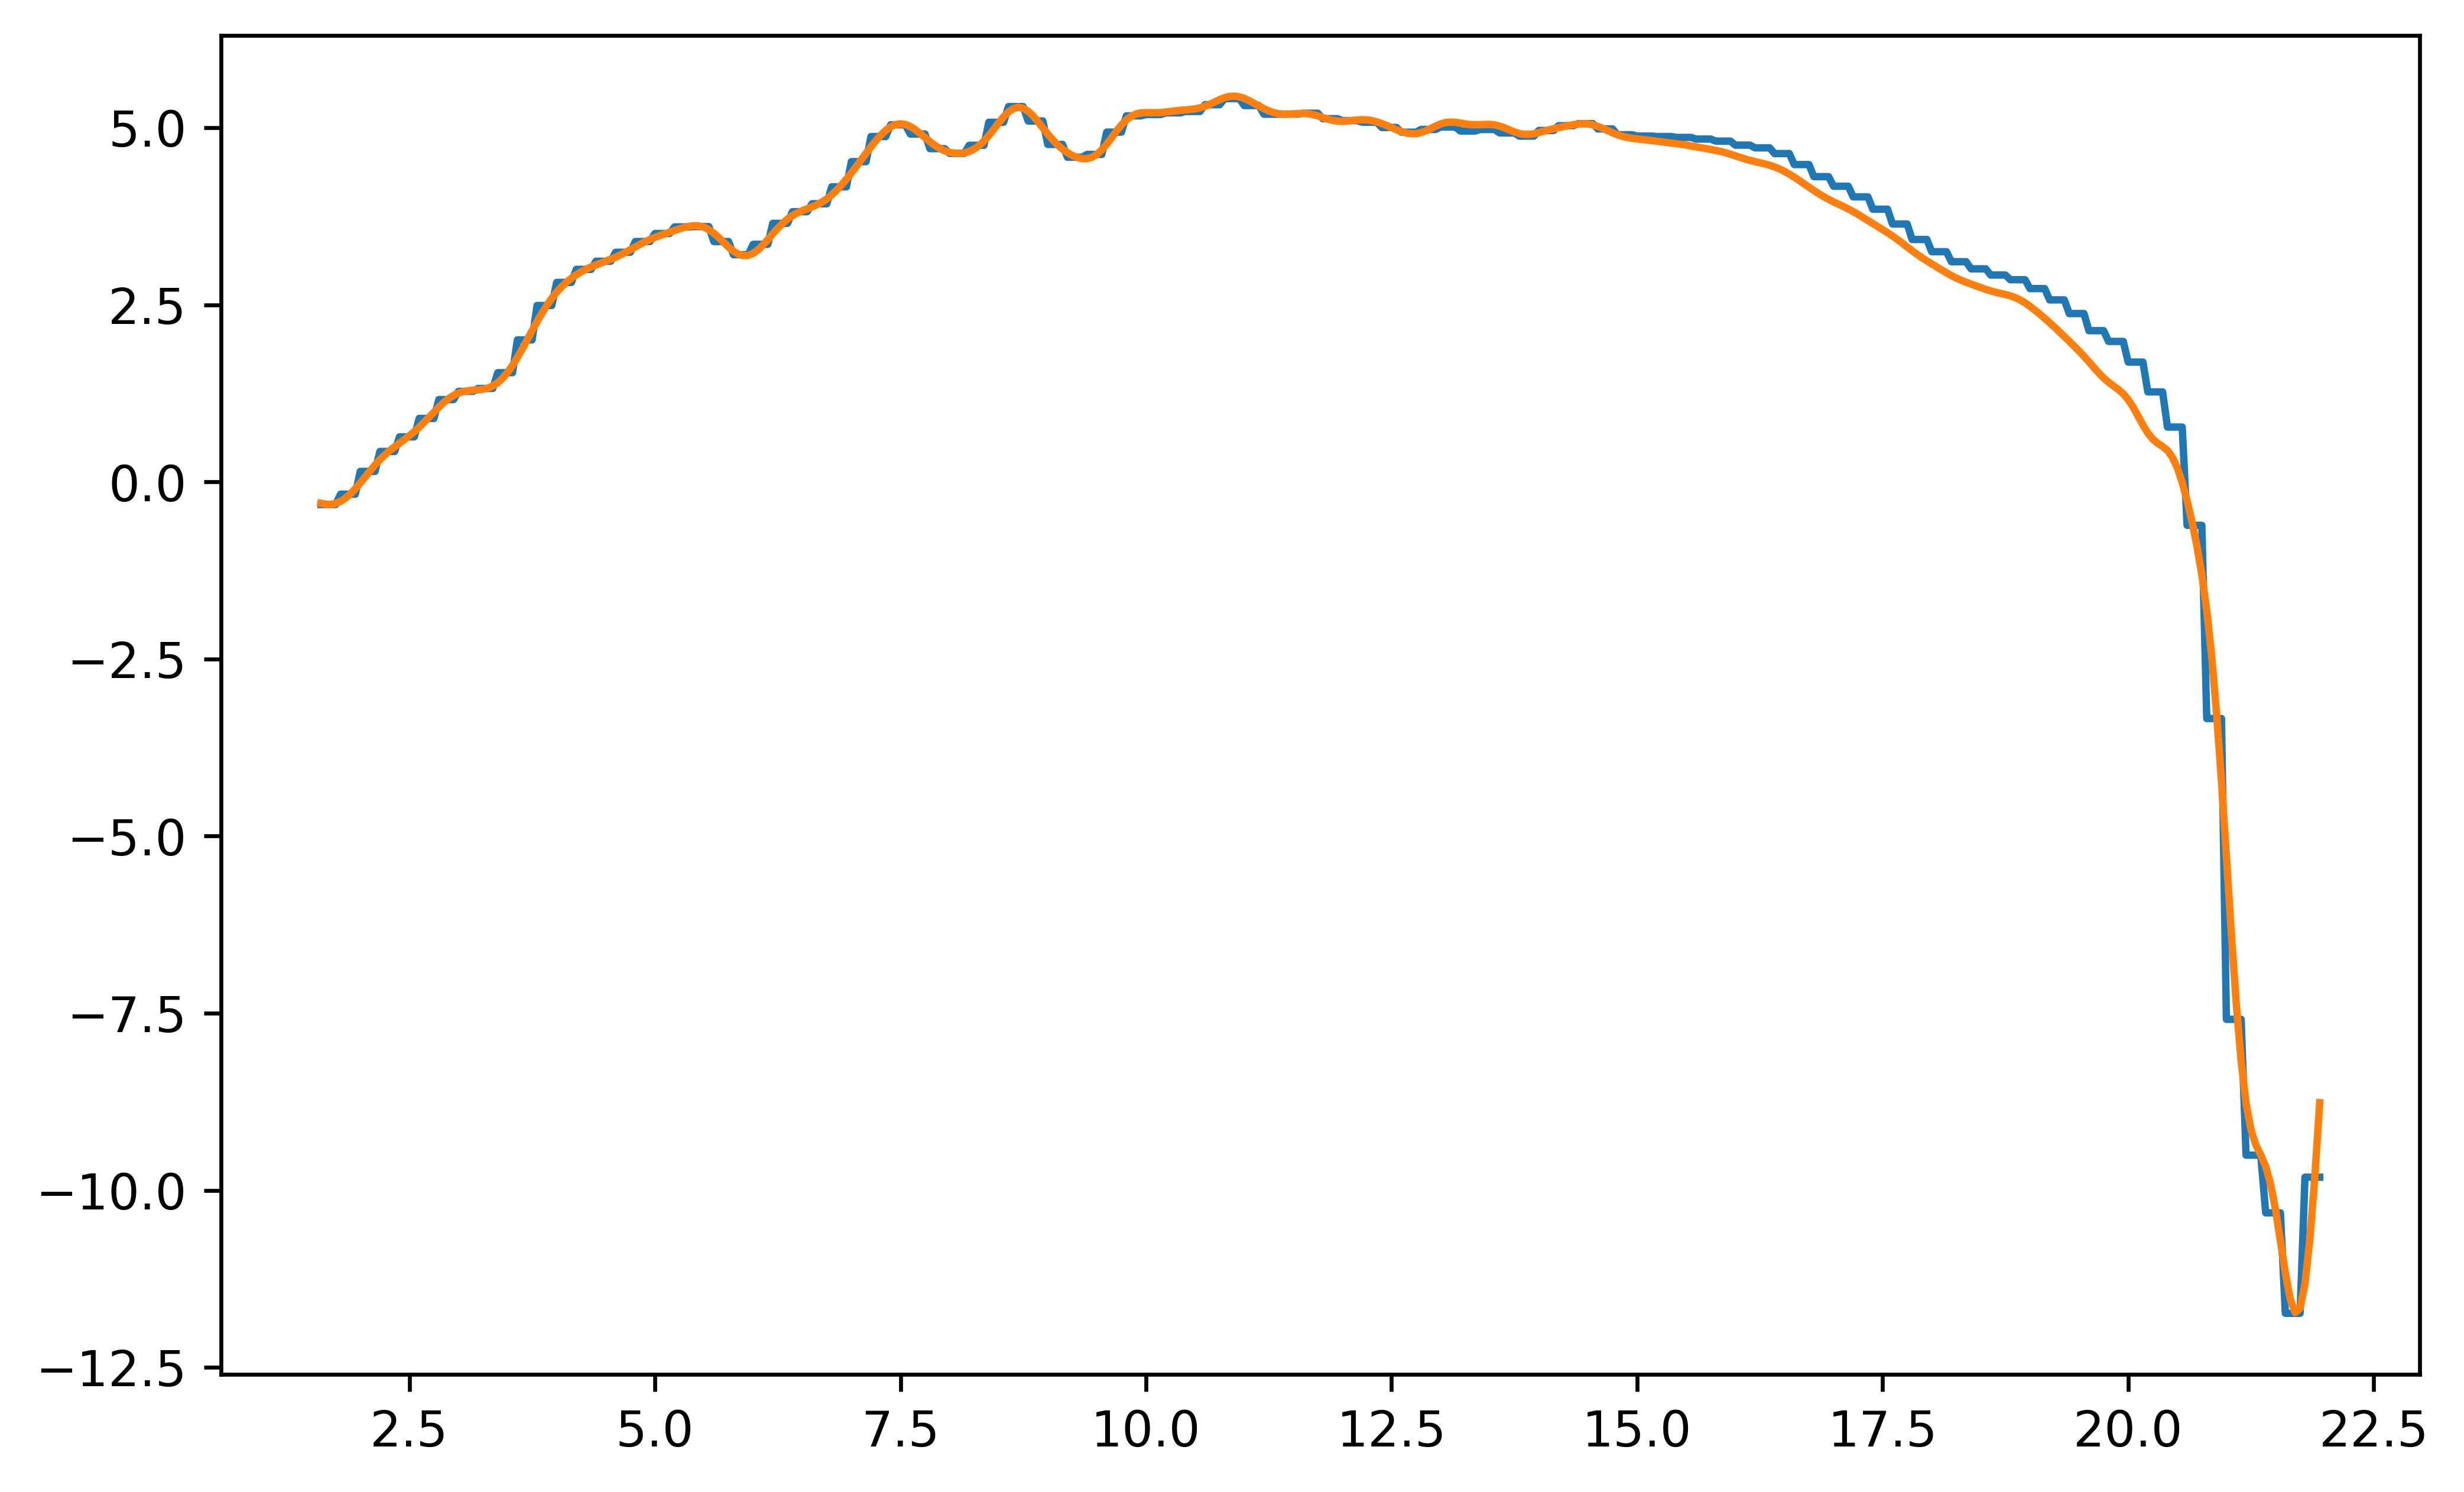

In [ ]:
# Simple query

import selectionfunctions.cog_v as CoGV
import selectionfunctions.cog_ii as CoGII
from selectionfunctions.source import Source

dr3_sf = CoGII.dr3_sf(version='modelAB',crowding=False)

ast_sf = CoGV.subset_sf(map_fname='astrometry_cogv.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')